In [140]:
plt.rcParams['font.size'] = 26
#plt.rcParams['axes.labelsize'] = 10
#plt.rcParams['axes.labelweight'] = 'bold'
#plt.rcParams['axes.titlesize'] = 13
plt.rcParams['xtick.labelsize'] = 15
plt.rcParams['ytick.labelsize'] = 15
plt.rcParams['legend.fontsize'] = 18
plt.rcParams['figure.titlesize'] = 22
#plt.rcParams['image.cmap'] = 'jet'
#plt.rcParams['image.interpolation'] = 'none'
plt.rcParams['figure.figsize'] = (16, 9)
plt.rcParams['lines.linewidth'] = 0.1
plt.rcParams['lines.markersize'] = 3
plt.rcParams['legend.markerscale'] = 4
plt.rcParams['lines.marker'] = '.'

In [141]:
import ou
import numpy as np
import matplotlib.pyplot as plt
import scipy.ndimage as ff

In [3]:
print(ou.compute_struct.__doc__)

compute_struct(struct_bn,db)

Wrapper for ``compute_struct``.

Parameters
----------
struct_bn : in/output rank-2 array('d') with bounds (f2py_struct_bn_d0,f2py_struct_bn_d1)
db : input rank-2 array('d') with bounds (f2py_db_d0,f2py_db_d1)



In [19]:
a = np.zeros(shape=(2000,500000),order="F")
ou.ou_generator(1000,1,a)
a = np.ascontiguousarray(a).T
#np.save("../databases/gaussian_process",a)

# nuovo database gaussiano con stessa lunghezza di correlazione di quello lagrangiano

In [95]:
a = np.zeros(shape=(2000,500000),order="F")
ou.ou_generator(204,1,a)
a = np.ascontiguousarray(a).T
np.save("../databases/gaussian_process2",a)

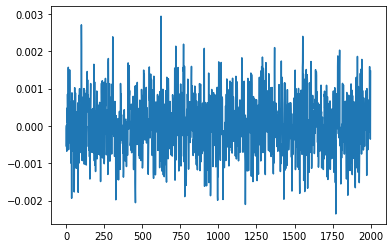

In [31]:
b = a[np.random.randint(0,100)]
c = np.gradient(b)
#plt.plot(b)
plt.plot(c)
plt.show()

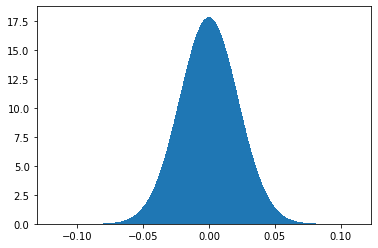

In [27]:
plt.hist(a.flatten(),bins=2000,density=True)
plt.show()

In [142]:
db = np.load('../databases/gaussian_process2_smooth.npy')

In [97]:
#a = ff.gaussian_filter1d(db,sigma=5,mode='nearest') ## la gaussiana è troncata a 4 sigma
#np.save('../databases/gaussian_process2_smooth',a)

In [ ]:
plt.plot(db[1000,start:end])
plt.plot(a[1000,start:end])

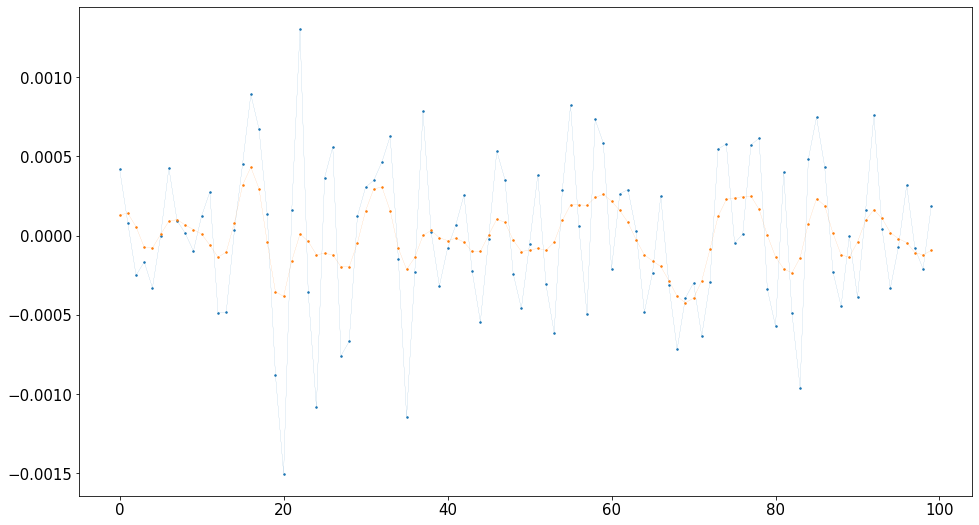

In [20]:
start = 100
end = 200
plt.plot(np.gradient(np.gradient(db[1000,start:end])))
plt.plot(np.gradient(np.gradient(a[1000,start:end])))

In [7]:
dbn.shape

(2000, 500000)

In [21]:
def compute_structure_function(db,npart=None):
    import ou
    import numpy as np
    struct = np.zeros(shape=(23,4),order='f')
    if db.shape[-1] != 1:
        if npart != None:
            idx = np.random.randint(0,db.shape[0],npart)
            dbn = np.asfortranarray(db[idx].T)
            ou.compute_struct(struct,dbn)
            return np.ascontiguousarray(struct)
        elif npart == None:
            dbn = np.asfortranarray(db.T)
            ou.compute_struct(struct,dbn)
            return np.ascontiguousarray(struct)
    elif db.shape[-1] == 1:
        if npart != None:
            idx = np.random.randint(0,db.shape[0],npart)
            dbn = np.asfortranarray(db[idx,:,0].T)
            ou.compute_struct(struct,dbn)
            return np.ascontiguousarray(struct)
        elif npart == None:
            dbn = np.asfortranarray(db.T)
            ou.compute_struct(struct,dbn)
            return np.ascontiguousarray(struct)
        
struct_realss = compute_structure_function(a,5000)


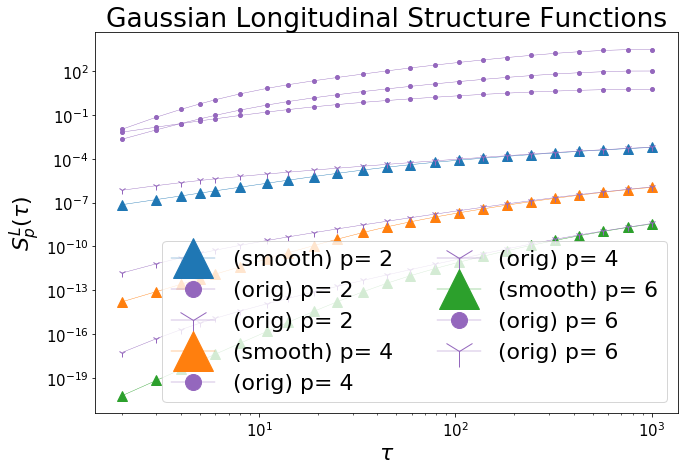

In [23]:
struct_real = np.load("../lagrangian/data/real/struct_function_327680_part.npy")
struct_reals = np.load(f"data/real/struct_function_500000_part_smooth.npy")
#struct_realss = np.load(f"data/real/struct_function_500000_part.npy")

import matplotlib.pyplot as plt
import matplotlib as mpl
mpl.rcParams.update({'font.size': 22})


plt.figure(figsize=(10,7))
plt.title("Gaussian Longitudinal Structure Functions")
plt.yscale('log')
plt.xscale('log')
for ii in range(1,4):
    plt.plot(struct_reals[:,0],struct_reals[:,ii],label="(smooth) p= "+str((ii)*2),marker='^',lw=0.4,ms=10, color='C'+str(ii-1))
    plt.plot(struct_real[:,0],struct_real[:,ii],label="(orig) p= "+str((ii)*2),marker='.',lw=0.4,ms=8, color='C4')
    plt.plot(struct_realss[:,0],struct_realss[:,ii],label="(orig) p= "+str((ii)*2),marker='1',lw=0.4,ms=8, color='C4')

plt.legend(ncol=2)
plt.xlabel("$\\tau$")
plt.ylabel('$S_p^L(\\tau)$')
plt.tight_layout()
plt.savefig(f"plots/real/struct_func",fmt="png",dpi=60)
plt.show()

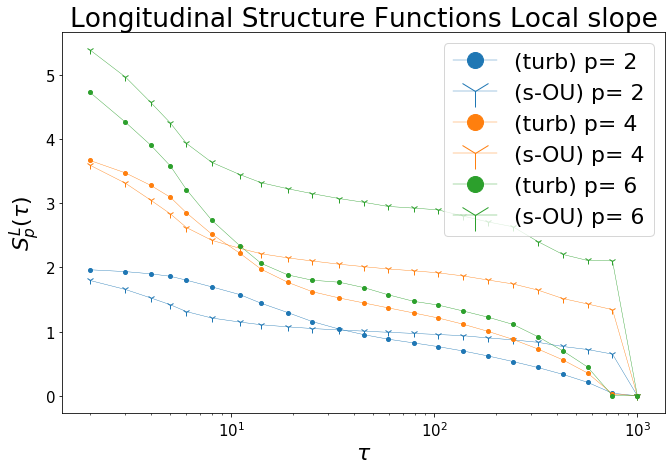

In [24]:
struct_real_log = np.log(struct_real)
dl_struct_real = np.zeros(shape=struct_real.shape)
struct_real_logs = np.log(struct_real)
dl_struct_reals = np.zeros(shape=struct_real.shape)
struct_real_logss = np.log(struct_realss)
dl_struct_realss = np.zeros(shape=struct_real.shape)
for ii in range(1,4):
    for jj in range(struct_real.shape[0]-1):
        dl_struct_real[jj,ii] = (np.log(struct_real[jj+1,ii]) - np.log(struct_real[jj,ii]))/(np.log(struct_real[jj+1,0])-np.log(struct_real[jj,0]))
        dl_struct_reals[jj,ii] = (np.log(struct_reals[jj+1,ii]) - np.log(struct_reals[jj,ii]))/(np.log(struct_reals[jj+1,0])-np.log(struct_reals[jj,0]))
        dl_struct_realss[jj,ii] = (np.log(struct_realss[jj+1,ii]) - np.log(struct_realss[jj,ii]))/(np.log(struct_realss[jj+1,0])-np.log(struct_realss[jj,0]))

plt.figure(figsize=(10,7))
plt.title("Longitudinal Structure Functions Local slope")
#plt.yscale('log')
plt.xscale('log')
for ii in range(1,4):
    plt.plot(struct_real[:,0],dl_struct_real[:,ii],label="(turb) p= "+str((ii)*2),marker='.',lw=0.4,ms=8, color='C'+str(ii-1))
    #plt.plot(struct_reals[:,0],dl_struct_reals[:,ii],label="(OU) p= "+str((ii)*2),marker='^',lw=0.4,ms=8, color='C'+str(ii-1))
    plt.plot(struct_realss[:,0],dl_struct_realss[:,ii],label="(s-OU) p= "+str((ii)*2),marker='1',lw=0.4,ms=8, color='C'+str(ii-1))
plt.xlabel("$\\tau$")
plt.legend()
plt.ylabel('$S_p^L(\\tau)$')
plt.tight_layout()
plt.savefig(f"plots/real/struct_func_loc_slope",fmt="png",dpi=60)
plt.show()

In [5]:
db = np.load('../databases/gaussian_process_smooth.npy')

[310663  62293 174168]


/usr/local/tensorflow/1.14-0/lib/python3.6/site-packages/ipykernel_launcher.py:21: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.


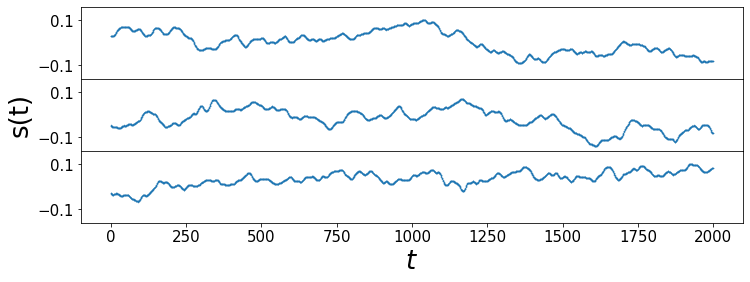

In [149]:
idx2 = np.random.randint(0,db.shape[0],3)
print(idx2)
gen_trajs = db[idx2]
fig, ax = plt.subplots(len(gen_trajs),1, figsize=(11,1.5*len(gen_trajs)), sharex=True, gridspec_kw={'hspace': 0, 'wspace': 0})
#plt.suptitle('esempi di velocità generate')

for i, traj in enumerate(gen_trajs):
    ax[i].plot(traj, lw=0, marker='.',ms=1)
    ax[i].set_ylim([-0.16,0.16])
    ax[i].set_yticks([-0.1,0.1])

    ax[1].set_ylabel('s(t)')
    
#fig.text(0.1,0.5,'$v(t)$',va='center', rotation='vertical')
ax[-1].set_xlabel("$t$")
    

fig.tight_layout()
plt.savefig(f'ou_real_trajs', fmt='png', dpi=60)
#plt.savefig(f'plots/wgangp_{run}/gan_test_gen_vel_{run}_{number}.png', fmt='png', dpi=60)
fig.show()

# SF OU vs smoothed OU

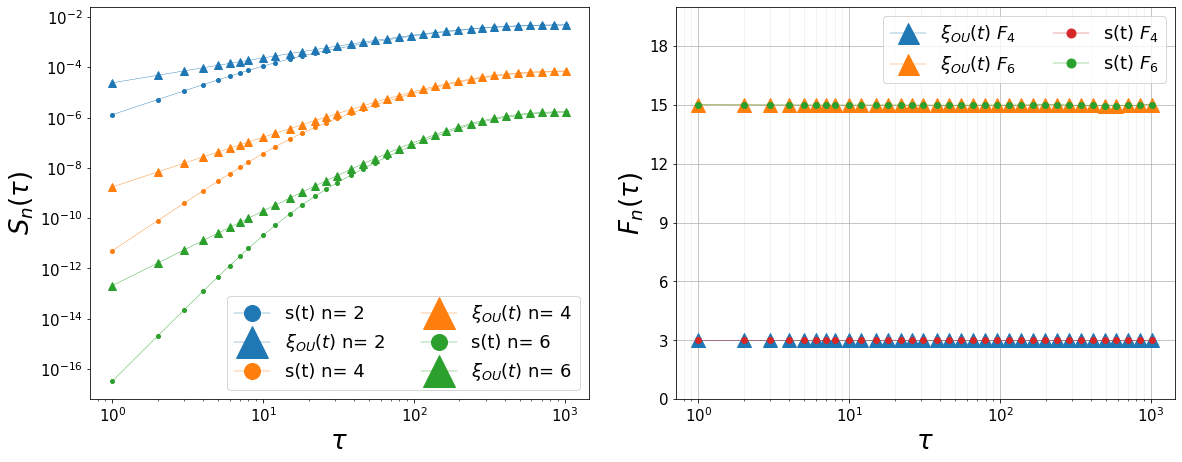

In [129]:
npart = 500000
struct = np.load(f"data/real/struct_function2_500000_part.npy")
struct_real = np.load(f"data/real/struct_function2_500000_part_smooth.npy")
#norm = ((1/(2*204))/(1/(2*1000)))**(-1.)
#struct_real[:,1] = struct_real[:,1] * norm ** 2
#struct_real[:,2] = struct_real[:,2] * norm ** 4
#struct_real[:,3] = struct_real[:,3] * norm ** 6

plt.figure(figsize=(17,7))

plt.subplot(121)
#plt.title("Longitudinal Structure Functions")
plt.yscale('log')
plt.xscale('log')
for ii in range(1,4):
    plt.plot(struct_real[:,0],struct_real[:,ii],label="s(t) n= "+str((ii)*2),marker='.',lw=0.4,ms=8, color='C'+str(ii-1))
    plt.plot(struct[:,0],struct[:,ii],label="$\\xi_{OU}(t)$ n= "+str((ii)*2),marker='^',lw=0.4,ms=8, color='C'+str(ii-1))
    
plt.legend(ncol=2)
plt.xlabel("$\\tau$")
plt.ylabel('$S_n(\\tau)$')
#plt.savefig(f"plots/wgangp_{run}/struct_func_comp_gen_{run}_{number}",fmt="png",dpi=60)





plt.subplot(122)
plt.xscale('log')

plt.plot(struct[:,0],struct[:,2]/struct[:,1]**2.,marker='^', label="$\\xi_{OU}(t)$ $F_4$", lw=0.4,ms=14,color='C0')
plt.ylabel('$F_n(\\tau)$')
plt.plot(struct[:,0],struct[:,3]/struct[:,1]**3.,marker='^', label="$\\xi_{OU}(t)$ $F_6$", lw=0.4,ms=14,color='C1')

#plt.yscale('log')
plt.plot(struct_real[:,0],struct_real[:,2]/struct_real[:,1]**2.,marker='.', label="s(t) $F_4$", lw=0.4,ms=12,color='C3')
plt.ylabel('$F_n(\\tau)$')
plt.plot(struct_real[:,0],struct_real[:,3]/struct_real[:,1]**3.,marker='.', label="s(t) $F_6$", lw=0.4,ms=12,color='C2')

#plt.ylabel("$K(\\tau)$")
plt.legend(ncol=2, markerscale=1.5)
plt.ylim([0,20])
plt.yticks([0,3,6,9,12,15,18])
plt.xlabel("$\\tau$")
plt.grid(which='minor', alpha=0.2)
plt.grid(which='major', alpha=0.9)
plt.tight_layout()
plt.savefig(f"ou_real_sf2_and_flatness",fmt="png",dpi=60)
#plt.savefig(f"plots/wgangp_{run}/struct_func_flatness_comp_gen_{run}_{number}",fmt="png",dpi=60)










#plt.savefig(f"ou_real_sf",fmt="png",dpi=60)
plt.show()

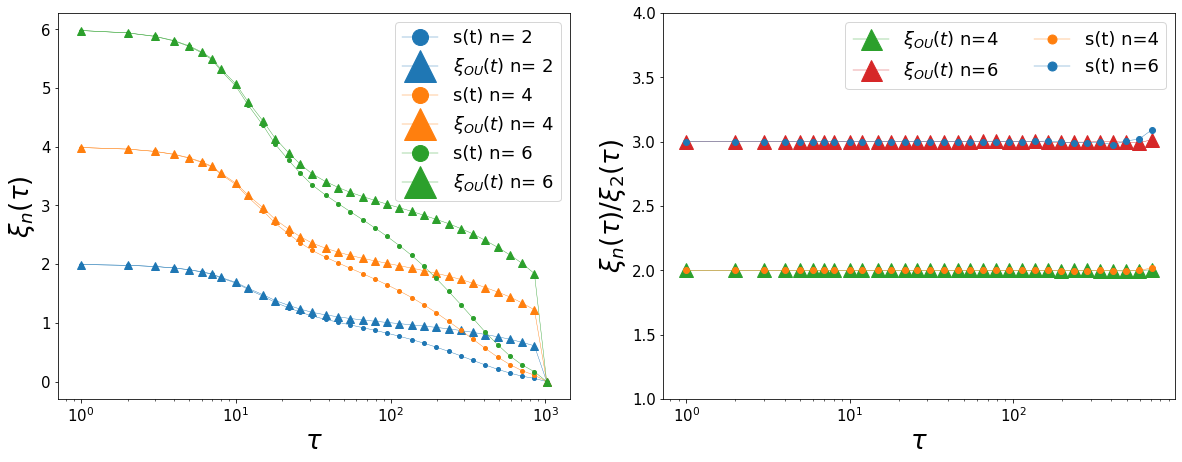

In [113]:
struct_real_log = np.log(struct_real)
dl_struct_real = np.zeros(shape=struct_real.shape)

struct_log = np.log(struct_real)
dl_struct = np.zeros(shape=struct_real.shape)

for ii in range(1,4):
    for jj in range(struct_real.shape[0]-1):
        dl_struct_real[jj,ii] = (np.log(struct_real[jj+1,ii]) - np.log(struct_real[jj,ii]))/(np.log(struct_real[jj+1,0])-np.log(struct_real[jj,0]))
        dl_struct[jj,ii] = (np.log(struct[jj+1,ii]) - np.log(struct[jj,ii]))/(np.log(struct[jj+1,0])-np.log(struct[jj,0]))

plt.figure(figsize=(17,7))
plt.subplot(1,2,1)
#plt.title("SF Local Slope $\\xi_n(\\tau)$")
plt.ylabel("$\\xi_n(\\tau)$")
#plt.yscale('log')
plt.xscale('log')
for ii in range(1,4):
    plt.plot(struct_real[:,0],dl_struct_real[:,ii],label="s(t) n= "+str((ii)*2),marker='.',lw=0.4,ms=8, color='C'+str(ii-1))
    plt.plot(struct[:,0],dl_struct[:,ii],label="$\\xi_{OU}(t)$ n= "+str((ii)*2),marker='^',lw=0.4,ms=8, color='C'+str(ii-1))
plt.legend()
plt.xlabel("$\\tau$")

#plt.tight_layout()

plt.subplot(1,2,2)
#plt.title("$ \\xi_n / \\xi_2 = \\Delta_n(\\tau) + n/2$")
plt.xscale('log')
plt.ylabel("$\\xi_n(\\tau)/ \\xi_2(\\tau)$")




plt.plot(struct[:-2,0],dl_struct[:-2,2]/dl_struct[:-2,1],label="$\\xi_{OU}(t)$ n=4",marker='^',lw=0.4,ms=14, color='C2')
plt.plot(struct[:-2,0],dl_struct[:-2,3]/dl_struct[:-2,1],label="$\\xi_{OU}(t)$ n=6",marker='^',lw=0.4,ms=14, color='C3')

plt.plot(struct_real[:-2,0],dl_struct_real[:-2,2]/dl_struct_real[:-2,1],label="s(t) n=4",marker='.',lw=0.4,ms=12, color='C1')
#plt.plot(struct_real[:-2,0], [4./2.]*len(struct_real[:-2,0]),lw=6, ls="--", color='C1', alpha = 0.3, label='n/2, n=4', ms=0)

plt.ylim([1,4])
plt.plot(struct_real[:-2,0],dl_struct_real[:-2,3]/dl_struct_real[:-2,1],label="s(t) n=6",marker='.',lw=0.4,ms=12, color='C0')
#plt.plot(struct_real[:-2,0], [6./2.]*len(struct_real[:-2,0]),lw=6, ls="--", color='C2', alpha = 0.3, label='n/2, n=6', ms=0)




plt.legend(ncol=2,markerscale=1.5)
plt.xlabel("$\\tau$")

plt.tight_layout()
plt.savefig(f"ou_real_sf2_locslope",fmt="png",dpi=60)
plt.show()

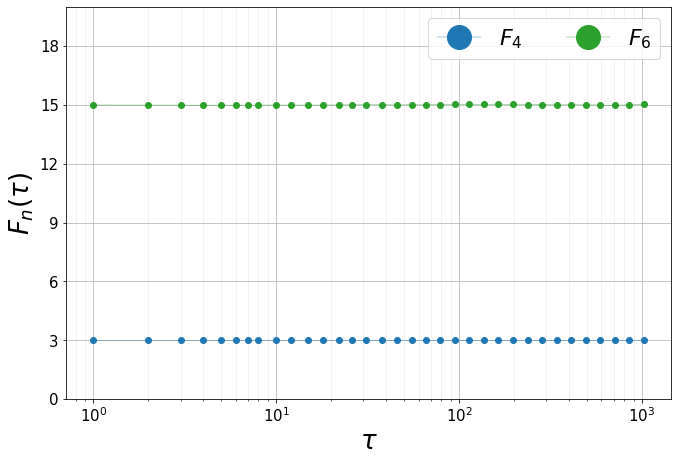

In [32]:
plt.figure(figsize=(10,7))
#plt.title("Flatness S4/S2^2 (K for Kurtosis)\nand S6/S2^3 (H for Hypertailedness)")
# plt.yscale('log')
plt.xscale('log')
#plt.yscale('log')

plt.plot(struct_real[:,0],struct_real[:,2]/struct_real[:,1]**2.,marker='.', label="$F_4$", lw=0.4,ms=12,color='C0')

plt.ylabel('$F_n(\\tau)$')
plt.plot(struct_real[:,0],struct_real[:,3]/struct_real[:,1]**3.,marker='.', label="$F_6$", lw=0.4,ms=12,color='C2')

#plt.ylabel("$K(\\tau)$")
plt.ylim([0,20])
plt.yticks([0,3,6,9,12,15,18])

plt.xlabel("$\\tau$")
plt.legend(ncol=2)
plt.grid(which='minor', alpha=0.2)
plt.grid(which='major', alpha=0.9)
plt.tight_layout()
plt.savefig(f"ou_real_sf_flatness",fmt="png",dpi=60)
#plt.savefig(f"plots/wgangp_{run}/struct_func_flatness_comp_gen_{run}_{number}",fmt="png",dpi=60)
plt.show()

In [91]:
#db = np.load('../databases/gaussian_process_smooth.npy')
db = np.load('../databases/gaussian_process.npy')
db = np.expand_dims(db,-1)

In [80]:
from acf_utils import *

In [93]:
xx = acf_x(db,npart=20000)

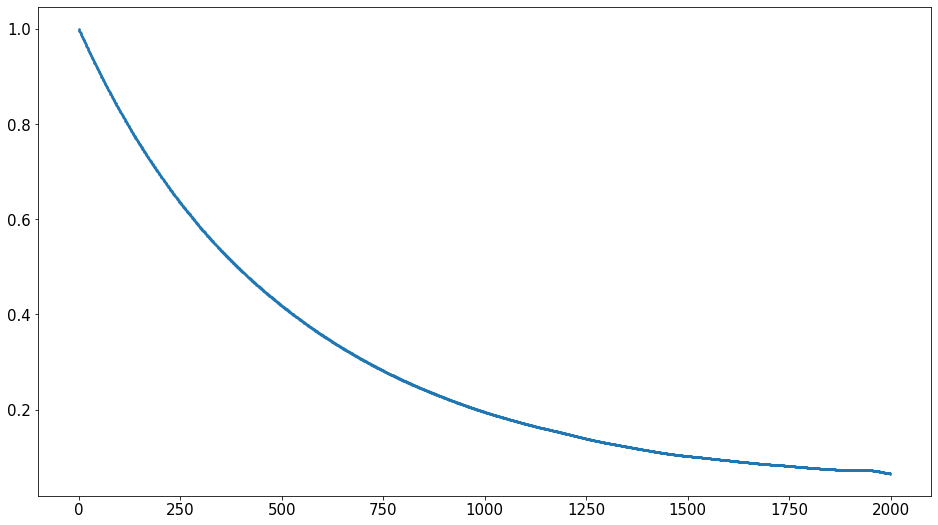

In [94]:
plt.plot(xx)

# SF turb vs OU2 smooth

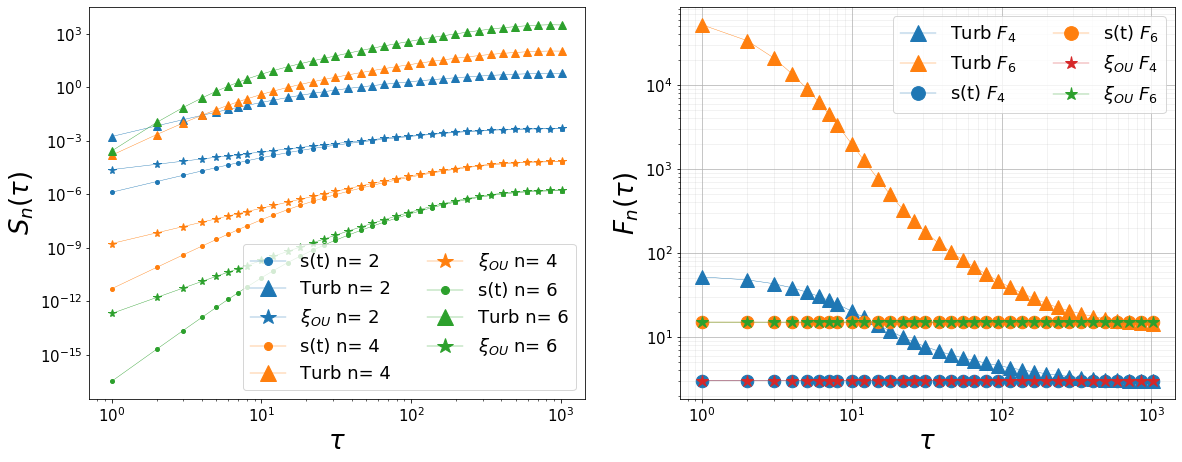

In [159]:
npart = 500000
struct = np.load(f"../lagrangian/data/real/struct_function_327680_part.npy")
struct_real = np.load(f"data/real/struct_function2_500000_part_smooth.npy")
struct_reall = np.load(f"data/real/struct_function2_500000_part.npy")

plt.figure(figsize=(17,7))

plt.subplot(121)
#plt.title("Longitudinal Structure Functions")
plt.yscale('log')
plt.xscale('log')
for ii in range(1,4):
    plt.plot(struct_real[:,0],struct_real[:,ii],label="s(t) n= "+str((ii)*2),marker='.',lw=0.4,ms=8, color='C'+str(ii-1))
    plt.plot(struct[:,0],struct[:,ii],label="Turb n= "+str((ii)*2),marker='^',lw=0.4,ms=8, color='C'+str(ii-1))
    plt.plot(struct_reall[:,0],struct_reall[:,ii],label="$\\xi_{OU}$ n= "+str((ii)*2),marker='*',lw=0.4,ms=8, color='C'+str(ii-1))
    
plt.legend(ncol=2,markerscale=2)
plt.xlabel("$\\tau$")
plt.ylabel('$S_n(\\tau)$')
#plt.savefig(f"plots/wgangp_{run}/struct_func_comp_gen_{run}_{number}",fmt="png",dpi=60)





plt.subplot(122)
plt.xscale('log')

plt.plot(struct[:,0],struct[:,2]/struct[:,1]**2.,marker='^', label="Turb $F_4$", lw=0.4,ms=14,color='C0')
plt.ylabel('$F_n(\\tau)$')
plt.plot(struct[:,0],struct[:,3]/struct[:,1]**3.,marker='^', label="Turb $F_6$", lw=0.4,ms=14,color='C1')

#plt.yscale('log')
plt.plot(struct_real[:,0],struct_real[:,2]/struct_real[:,1]**2.,marker='.', label="s(t) $F_4$", lw=0.4,ms=25,color='C0')
plt.ylabel('$F_n(\\tau)$')
plt.plot(struct_real[:,0],struct_real[:,3]/struct_real[:,1]**3.,marker='.', label="s(t) $F_6$", lw=0.4,ms=25,color='C1')

#plt.yscale('log')
plt.plot(struct_reall[:,0],struct_reall[:,2]/struct_reall[:,1]**2.,marker='*', label="$\\xi_{OU}$ $F_4$", lw=0.4,ms=12,color='C3')
plt.ylabel('$F_n(\\tau)$')
plt.plot(struct_reall[:,0],struct_reall[:,3]/struct_reall[:,1]**3.,marker='*', label="$\\xi_{OU}$ $F_6$", lw=0.4,ms=12,color='C2')

#plt.ylabel("$K(\\tau)$")
plt.legend(ncol=2, markerscale=1.1)
plt.yscale('log')
plt.xlabel("$\\tau$")
plt.grid(which='minor', alpha=0.2)
plt.grid(which='major', alpha=0.9)
plt.tight_layout()
plt.savefig(f"ou_real_sf2_and_flatness",fmt="png",dpi=60)
#plt.savefig(f"plots/wgangp_{run}/struct_func_flatness_comp_gen_{run}_{number}",fmt="png",dpi=60)










plt.savefig(f"sf_turb_ou2",fmt="png",dpi=60)
plt.show()

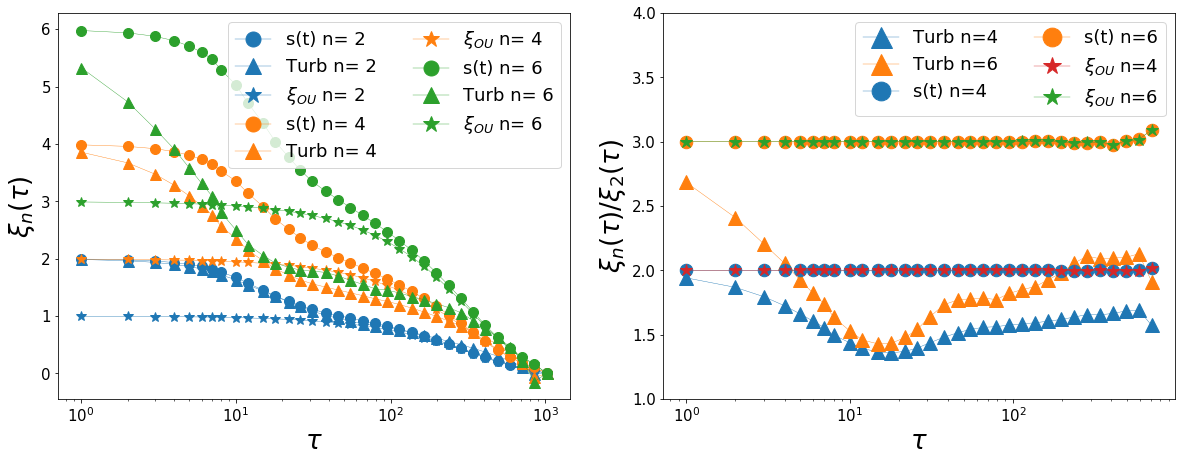

In [174]:
struct_real_log = np.log(struct_real)
dl_struct_real = np.zeros(shape=struct_real.shape)

struct_reall_log = np.log(struct_reall)
dl_struct_reall = np.zeros(shape=struct_reall.shape)

struct_log = np.log(struct_real)
dl_struct = np.zeros(shape=struct_real.shape)

for ii in range(1,4):
    for jj in range(struct_real.shape[0]-1):
        dl_struct_real[jj,ii] = (np.log(struct_real[jj+1,ii]) - np.log(struct_real[jj,ii]))/(np.log(struct_real[jj+1,0])-np.log(struct_real[jj,0]))
        dl_struct[jj,ii] = (np.log(struct[jj+1,ii]) - np.log(struct[jj,ii]))/(np.log(struct[jj+1,0])-np.log(struct[jj,0]))
        dl_struct_reall[jj,ii] = (np.log(struct_reall[jj+1,ii]) - np.log(struct_reall[jj,ii]))/(np.log(struct_reall[jj+1,0])-np.log(struct_reall[jj,0]))

plt.figure(figsize=(17,7))
plt.subplot(1,2,1)
#plt.title("SF Local Slope $\\xi_n(\\tau)$")
plt.ylabel("$\\xi_n(\\tau)$")
#plt.yscale('log')
plt.xscale('log')
for ii in range(1,4):
    plt.plot(struct_real[:,0],dl_struct_real[:,ii],label="s(t) n= "+str((ii)*2),marker='.',lw=0.4,ms=20, color='C'+str(ii-1))
    plt.plot(struct[:,0],dl_struct[:,ii],label="Turb n= "+str((ii)*2),marker='^',lw=0.4,ms=11, color='C'+str(ii-1))
    plt.plot(struct_reall[:,0],dl_struct_reall[:,ii],label="$\\xi_{OU}$ n= "+str((ii)*2),marker='*',lw=0.4,ms=11, color='C'+str(ii-1))
plt.legend(markerscale=1.5,ncol=2)
plt.xlabel("$\\tau$")

#plt.tight_layout()

plt.subplot(1,2,2)
#plt.title("$ \\xi_n / \\xi_2 = \\Delta_n(\\tau) + n/2$")
plt.xscale('log')
plt.ylabel("$\\xi_n(\\tau)/ \\xi_2(\\tau)$")




plt.plot(struct[:-2,0],dl_struct[:-2,2]/dl_struct[:-2,1],label="Turb n=4",marker='^',lw=0.4,ms=14, color='C0')
plt.plot(struct[:-2,0],dl_struct[:-2,3]/dl_struct[:-2,1],label="Turb n=6",marker='^',lw=0.4,ms=14, color='C1')

plt.plot(struct_real[:-2,0],dl_struct_real[:-2,2]/dl_struct_real[:-2,1],label="s(t) n=4",marker='.',lw=0.4,ms=25, color='C0')
#plt.plot(struct_real[:-2,0], [4./2.]*len(struct_real[:-2,0]),lw=6, ls="--", color='C1', alpha = 0.3, label='n/2, n=4', ms=0)

plt.ylim([1,4])
plt.plot(struct_real[:-2,0],dl_struct_real[:-2,3]/dl_struct_real[:-2,1],label="s(t) n=6",marker='.',lw=0.4,ms=25, color='C1')
#plt.plot(struct_real[:-2,0], [6./2.]*len(struct_real[:-2,0]),lw=6, ls="--", color='C2', alpha = 0.3, label='n/2, n=6', ms=0)


plt.plot(struct_reall[:-2,0],dl_struct_reall[:-2,2]/dl_struct_reall[:-2,1],label="$\\xi_{OU}$ n=4",marker='*',lw=0.4,ms=12, color='C3')
plt.plot(struct_reall[:-2,0],dl_struct_reall[:-2,3]/dl_struct_reall[:-2,1],label="$\\xi_{OU}$ n=6",marker='*',lw=0.4,ms=12, color='C2')



plt.legend(ncol=2,markerscale=1.5)
plt.xlabel("$\\tau$")

plt.tight_layout()
plt.savefig(f"sf_locslope_turb_ou2",fmt="png",dpi=60)
plt.show()